In [10]:
pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ------- ------------------------------- 51.2/282.6 kB 525.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 563.7 kB/s eta 0:00:01
   ----------- --------------------------- 81.9/282.6 kB 459.5 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 516.7 kB/s eta 0:00:01
   ----------------- -------------------- 133.1/282.6 kB 463.7 kB/s eta 0:00:01
   ---------------------- --------------- 163.8/282.6 kB 492.3 kB/s eta 0:00:01
   ------------------------ ------------- 184.3/282.6 kB 484.9 kB/s eta 0:00:01
   -----------

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

file_path = '2_letter_recognition.data'


In [12]:
dataset = pd.read_csv(file_path, sep = ",")

In [13]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [14]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [16]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [17]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


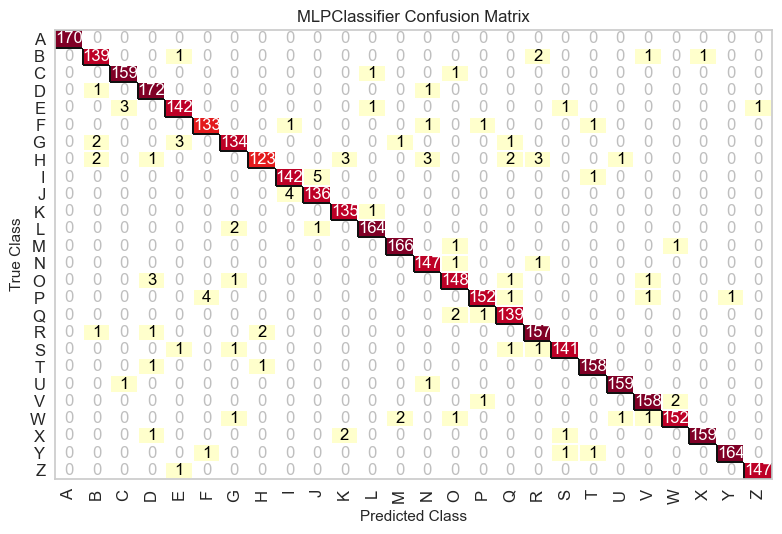

In [18]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [19]:
# !pip install yellowbrick

In [20]:
cm.fit(X_train, Y_train.values.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001F543944050>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [21]:
cm.score(X_validation, Y_validation)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.974

In [22]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [23]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.974
